In [1]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['maxsize']= '100000'
environ['batch_size']= str(2048)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='MSE'
environ['layers'] = '300 200 120 100 80 50 30'
environ['dropouts'] = '0.3 0.2 0.2 0.1 0.1 0.05 0.05'

%run utils.ipynb

In [2]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}") 

In [16]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


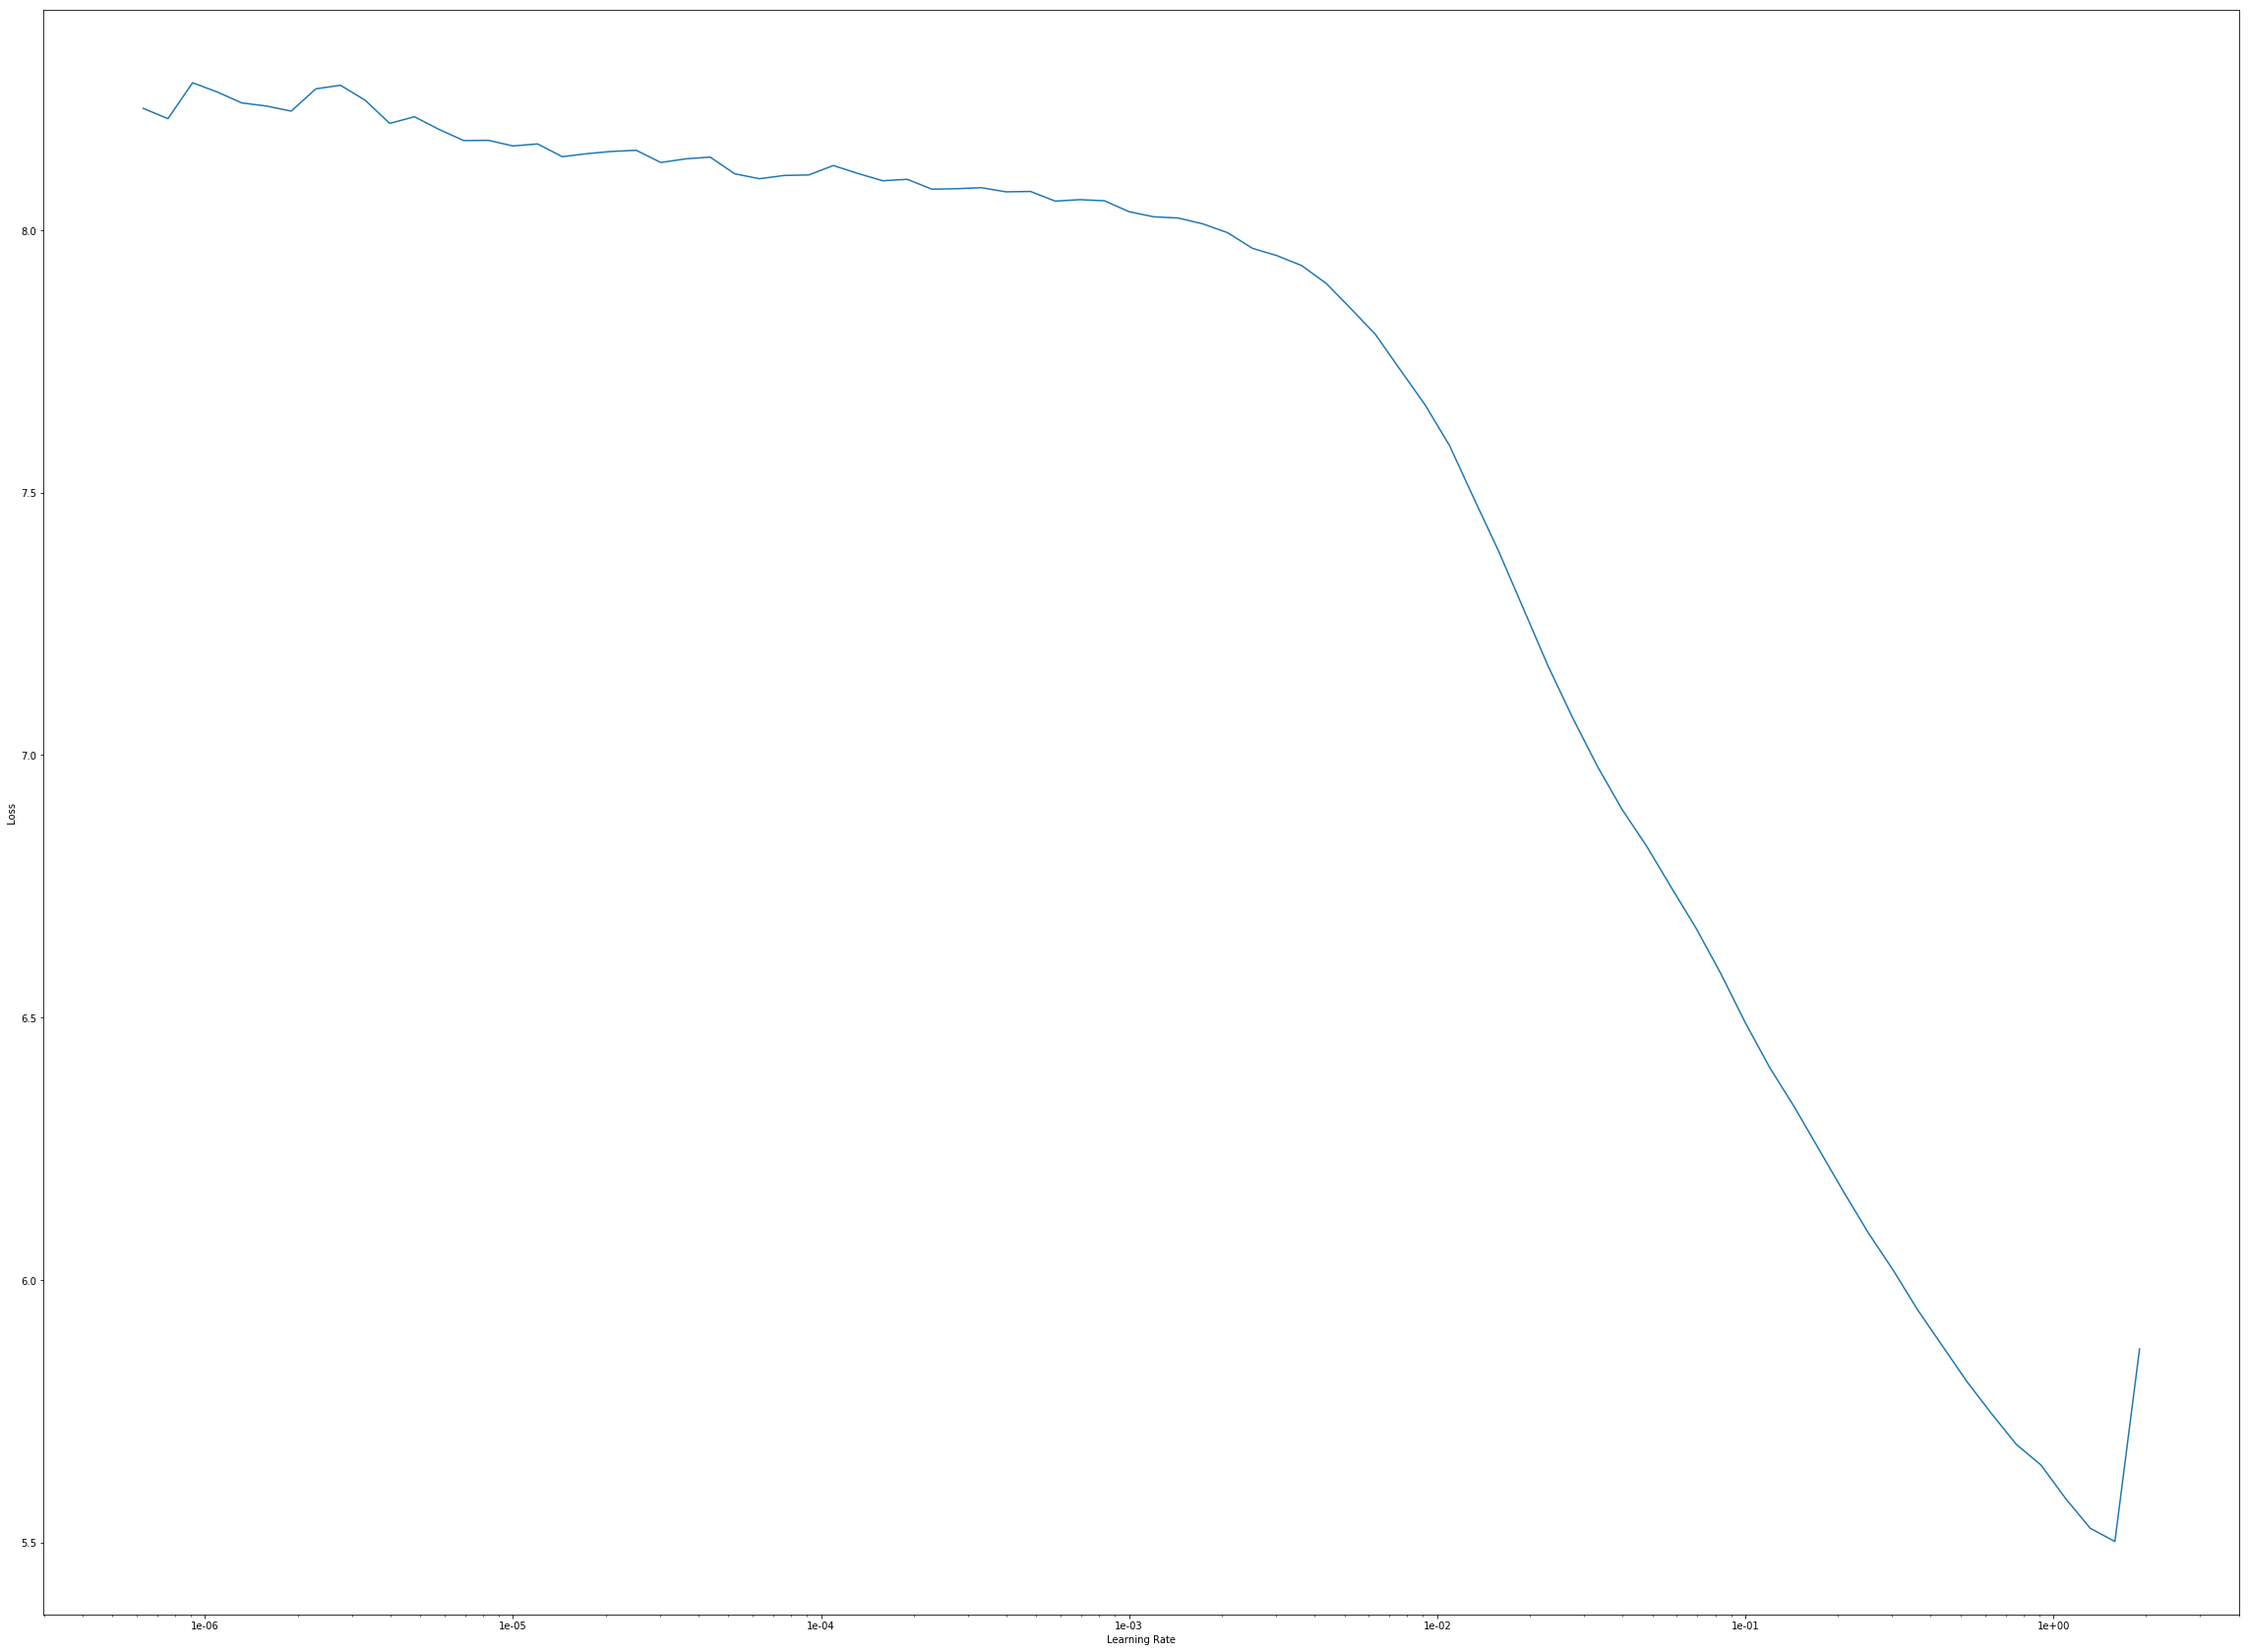

In [17]:
l.recorder.plot()

In [6]:
lr = 1e-03

In [7]:
l.model.train()
l.fit_one_cycle(1200, lr)

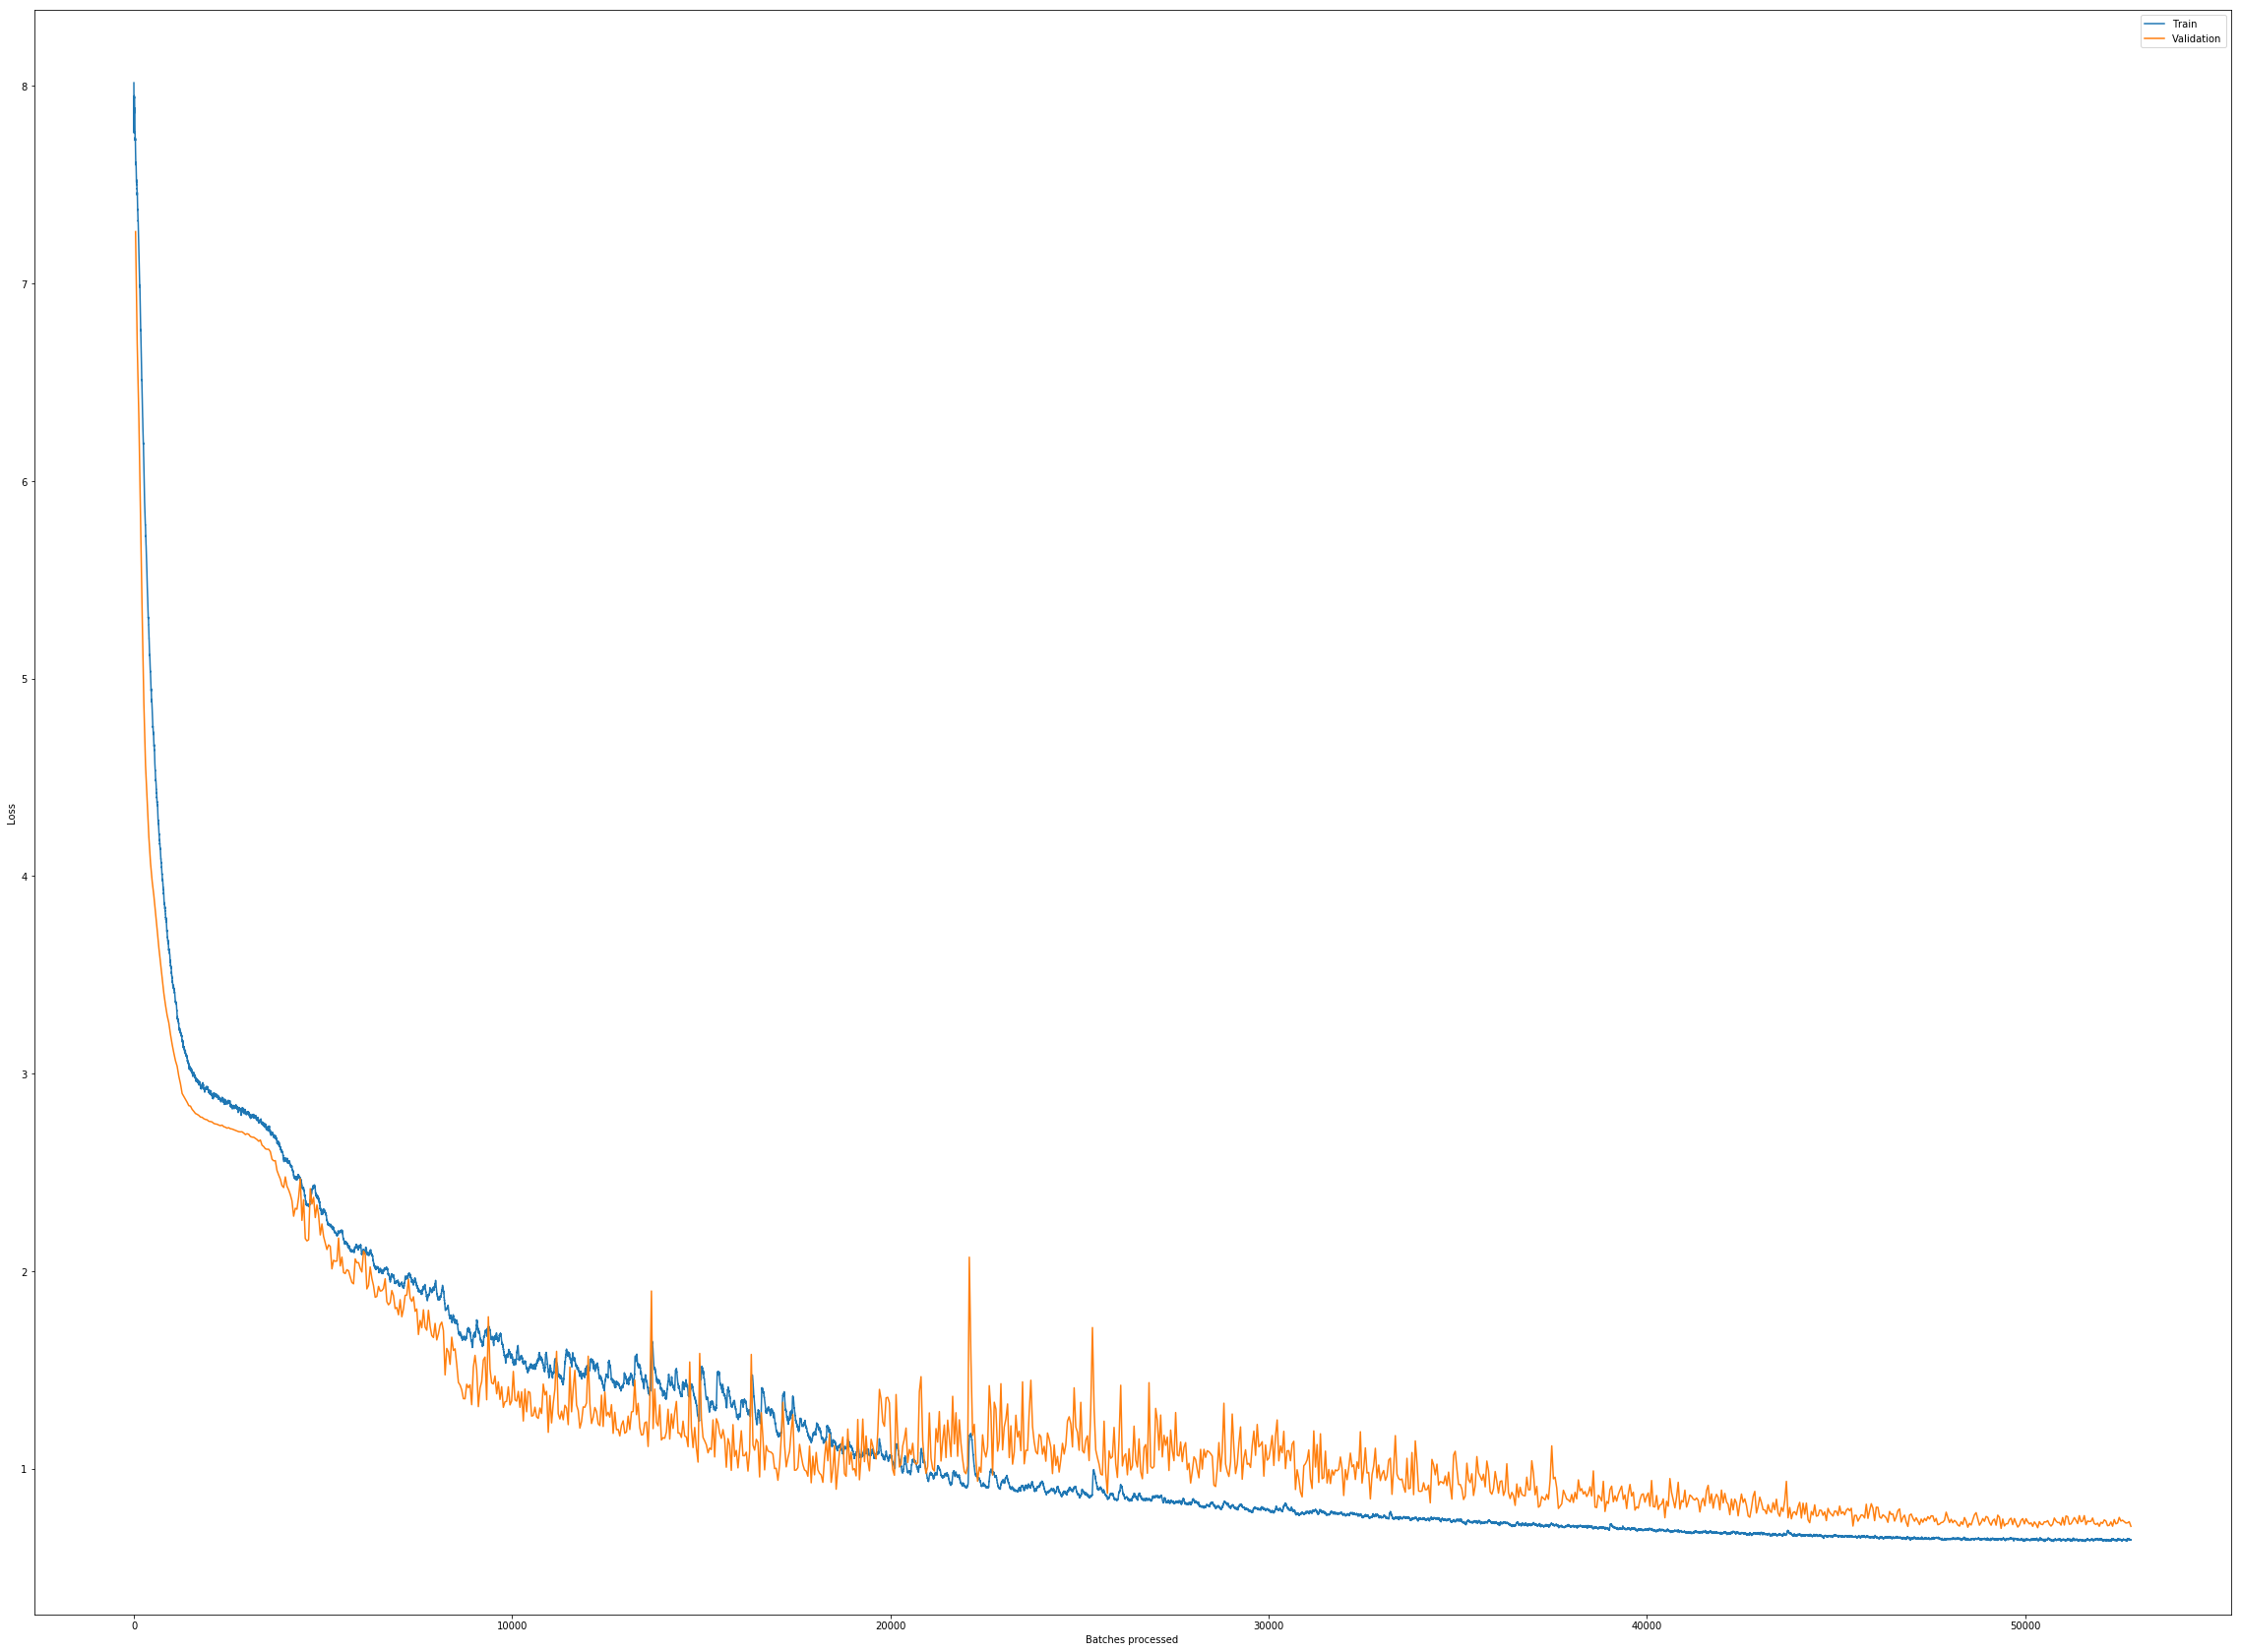

In [8]:
l.recorder.plot_losses()

In [14]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}")

In [3]:
val_df = pd.DataFrame()
train_df = pd.DataFrame()

preds, targets = l.get_preds(fai.basic_data.DatasetType.Valid)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

val_df['prediction'] = preds
val_df['target'] = targets
val_df['abs_diff'] = np.abs(preds - targets)
val_df['APE'] = np.abs(val_df.target - val_df.prediction)/val_df.target * 100

preds, targets = l.get_preds(fai.basic_data.DatasetType.Train)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

train_df['prediction'] = preds
train_df['target'] = targets
train_df['abs_diff'] = np.abs(preds - targets)
train_df['APE'] = np.abs(train_df.target - train_df.prediction)/train_df.target * 100

In [15]:
val_df.describe() #L2 loss

prediction        target      abs_diff           APE
count  10000.000000  10000.000000  10000.000000  10000.000000
mean       2.190411      2.027992      0.572748     75.797997
std        1.594023      1.919017      0.616799    148.084808
min        0.190113      0.030862      0.000204      0.003586
25%        1.081163      0.652639      0.164485      9.994051
50%        1.673501      1.392690      0.374921     24.825982
75%        2.846386      2.590816      0.760336     70.129059
max       10.311938     13.272740      5.860677   2385.351807

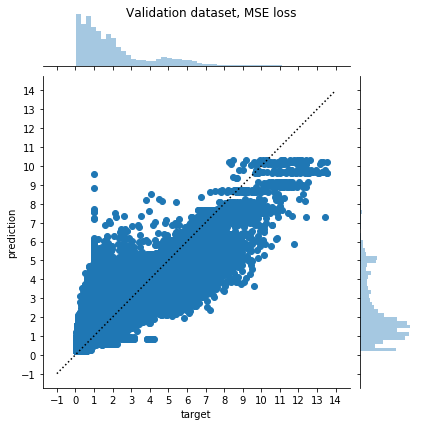

In [14]:
joint_plot(train_df, f"Validation dataset, {loss_func} loss")

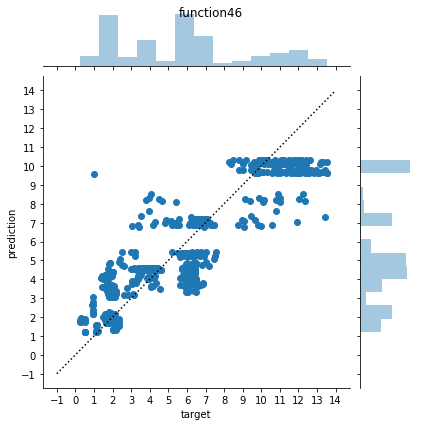

In [13]:
rand_prog = 'function' + str(np.random.randint(0, 400))
joint_plot_one_program(val_dl, 'function46', l.model)